In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [67]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [68]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
x=df[['highway-mpg']]
y=df['price']


In [70]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
yhat=lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [72]:
a=lm.intercept_
a

38423.305858157386

In [73]:
b=lm.coef_
b

array([-821.73337832])

In [74]:
yhat=a+b*x
yhat

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


In [75]:
lm2=LinearRegression()
lm2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
x1=df[['engine-size']]
y1=df['price']

In [77]:
lm2.fit(x1,y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
yhat1=lm.predict(x1)
yhat1[0:5]

array([-68402.03332369, -68402.03332369, -86480.16764678, -51145.63237893,
       -73332.43359362])

In [79]:
a1=lm2.intercept_
a1

-7963.338906281049

In [80]:
b1=lm2.coef_
b1

array([166.86001569])

In [81]:
yhat2=a+b*x
yhat2

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


In [82]:
#multiple linear regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [83]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
a=lm.intercept_

In [85]:
b=lm.coef_
b

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [86]:
yhat=a+b*Z
yhat

,horsepower,curb-weight,engine-size,highway-mpg
0,-9868.597017,-3811.402492,-5207.690330,-14833.072428
1,-9868.597017,-3811.402492,-5207.690330,-14833.072428
2,-7568.280016,-2516.784719,-3414.024526,-14869.129917
3,-10350.058715,-4804.727402,-6919.825870,-14724.899962
4,-9654.614040,-2512.077018,-4718.508747,-15013.359872
...,...,...,...,...
196,-9708.109785,-1909.491290,-4310.857428,-14797.014939
197,-7247.305550,-1452.844294,-4310.857428,-14905.187406
198,-8638.194900,-1627.029231,-1701.888985,-14977.302384
199,-10136.075738,-661.950527,-3984.736372,-14833.072428


In [87]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48269.443837853854)

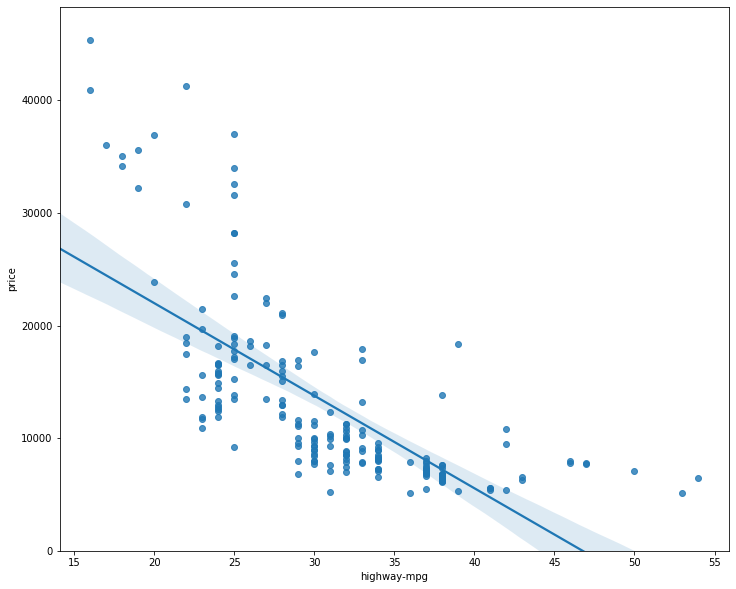

In [88]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

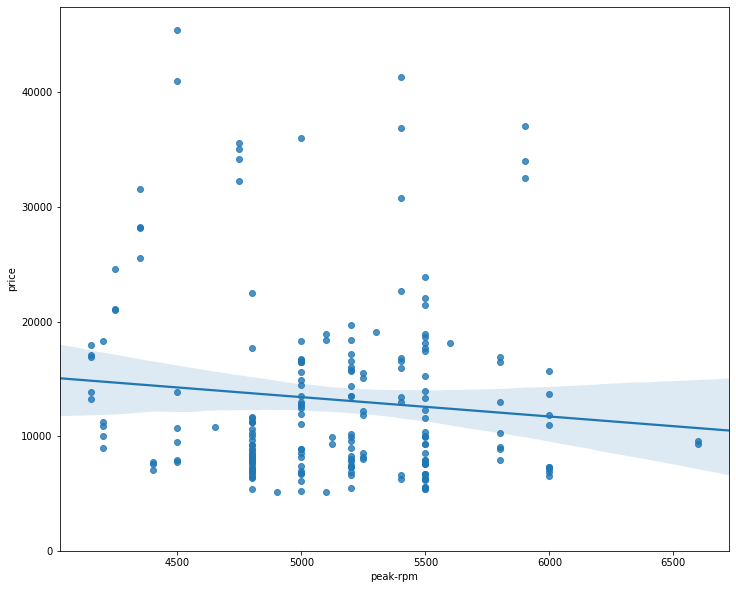

In [89]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

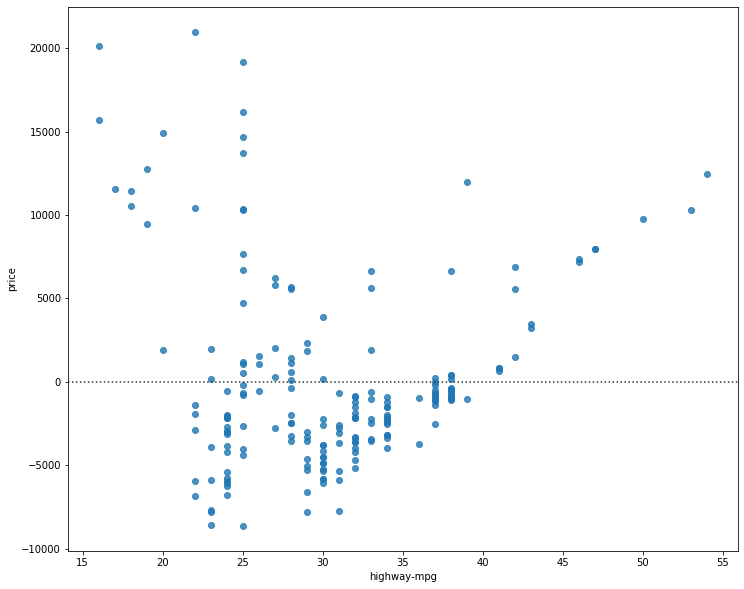

In [90]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

ValueError: too many values to unpack (expected 2)

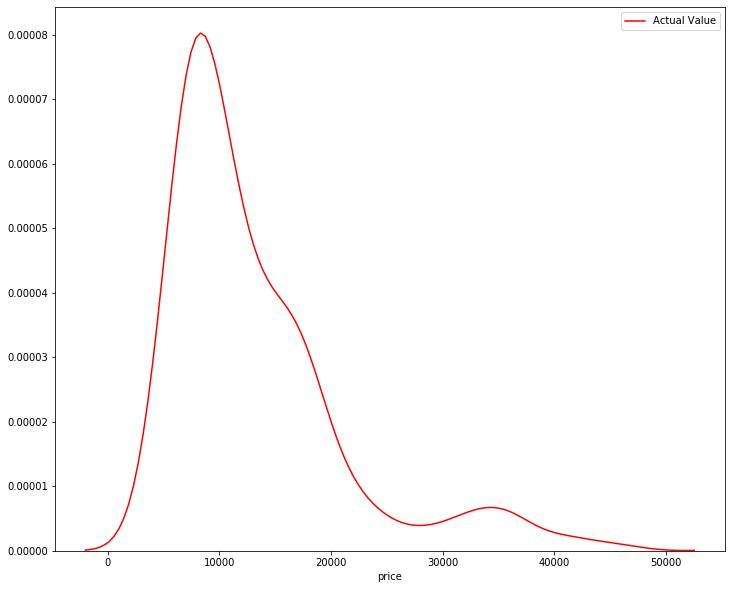

In [91]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [92]:
#polynomial regression
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()


In [93]:
x = df['highway-mpg']
y = df['price']

In [94]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


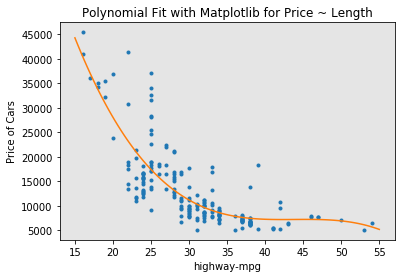

In [95]:
PlotPolly(p, x, y, 'highway-mpg')

In [96]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


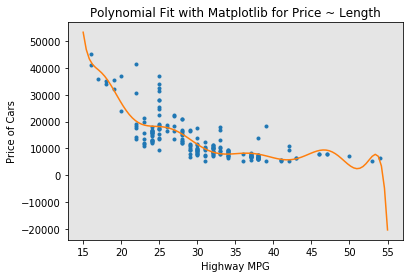

In [97]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [116]:
Z_pr=pr.fit_transform(Z)

In [117]:
Z.shape

(201, 4)

In [139]:
Z_pr.shape

(201, 15)

In [140]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [141]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [142]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [143]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [144]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])